In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist_data = pd.read_csv('data/mnist.csv').values

In [176]:
labels = mnist_data[:, 0]
features = mnist_data[:, 1:]

In [177]:
list(features[0][320:330])

[0, 23, 210, 254, 253, 159, 0, 0, 0, 0]

In [44]:
!echo $PATH

/home/platelminto/Documents/uu/patternrecognition-mnist2/venv/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/home/platelminto/.local/share/JetBrains/Toolbox/scripts


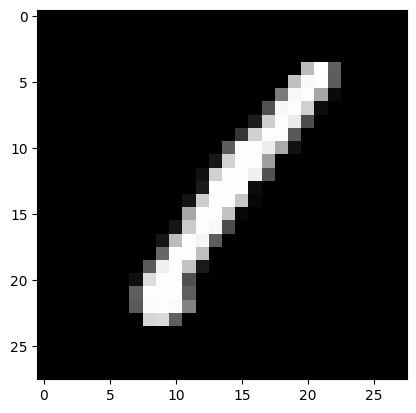

In [178]:
img_size = 28
plt.imshow(features[0].reshape(img_size, img_size), cmap='gray')
plt.show()

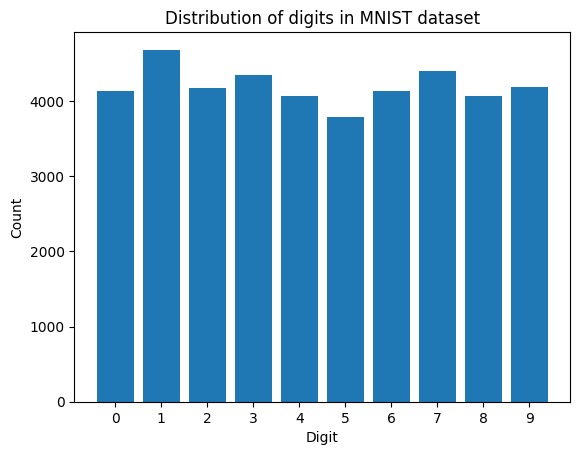

In [179]:
from collections import Counter

digit_counter = Counter(labels)

digits = list(range(10))
counts = [digit_counter[i] for i in digits]

plt.bar(digits, counts)

plt.title('Distribution of digits in MNIST dataset')
plt.xlabel('Digit')
plt.ylabel('Count')

plt.xticks(digits)

plt.show()

In [180]:
most_likely_digit = digit_counter.most_common(1)[0][0]

# calculate accuracy of always guessing the most likely digit
accuracy_majority_label = digit_counter[most_likely_digit] / len(labels)
print(f"Accuracy always predicting the majority label (i.e. '{most_likely_digit}'): {accuracy_majority_label:.1%}")

Accuracy always predicting the majority label (i.e. '1'): 11.2%


In [181]:
mean_values = np.mean(features, axis=0)

most_common_mean_values = Counter(mean_values).most_common(3)
most_common_mean_values

[(0.0, 76), (0.0007619047619047619, 2), (0.003, 1)]

In [182]:
# total number of pixels with mean under 0.01
sum(mean_values < 0.1)

187

In [183]:
max_values = np.max(features, axis=0)

sum(max_values < 50)

91

# From the above, we can tell that 76 pixels are always black, and therefore carry no information between images.

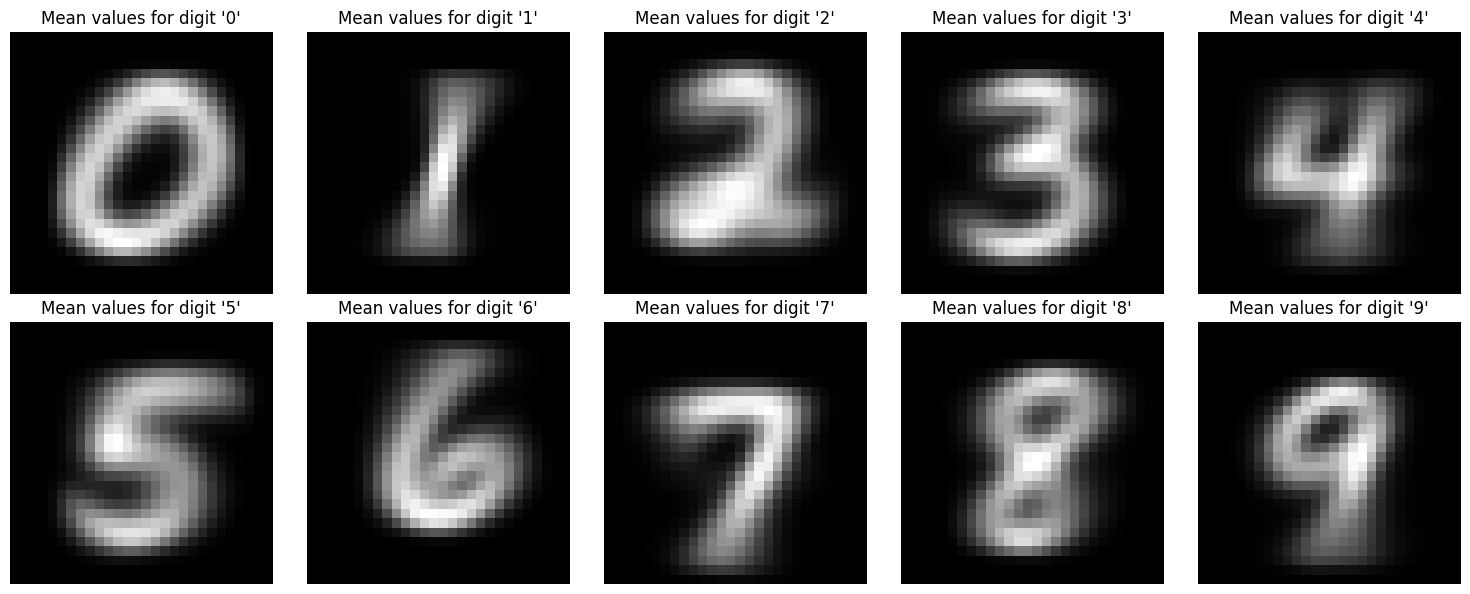

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for digit in digits:
    digit_features = features[labels == digit]
    digit_mean_values = np.mean(digit_features, axis=0)
    
    row = digit // 5
    col = digit % 5
    
    ax = axes[row, col]
    ax.imshow(digit_mean_values.reshape(img_size, img_size), cmap='gray')
    ax.set_title(f"Mean values for digit '{digit}'")
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [185]:
ink = np.array([sum(row) for row in features])
ink[:10]

array([16649, 44609, 13425, 15025, 51093, 23061, 17152, 24288, 27920,
       31570])

In [72]:
ink_mean = [np.mean(ink[labels == digit]) for digit in digits]
ink_std = [np.std(ink[labels == digit]) for digit in digits]

for digit, mean, std in zip(digits, ink_mean, ink_std):
    print(f"Ink for digit '{digit}': {mean:.0f} ±{std:.0f}")

Ink for digit '0': 34632 ±8462
Ink for digit '1': 15188 ±4409
Ink for digit '2': 29871 ±7653
Ink for digit '3': 28320 ±7574
Ink for digit '4': 24233 ±6375
Ink for digit '5': 25836 ±7527
Ink for digit '6': 27735 ±7531
Ink for digit '7': 22931 ±6168
Ink for digit '8': 30184 ±7777
Ink for digit '9': 24554 ±6465


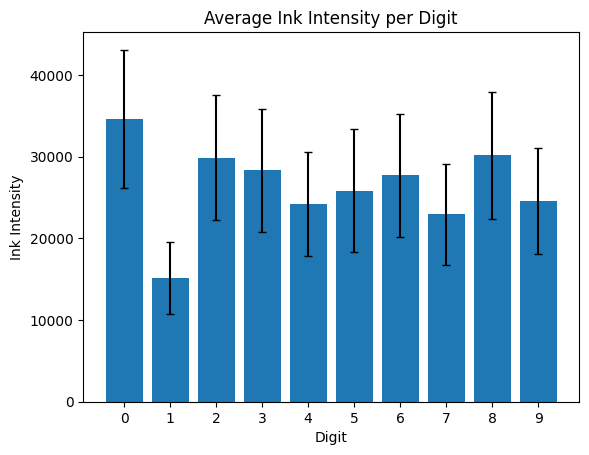

In [73]:
plt.bar(digits, ink_mean, yerr=ink_std, capsize=3)
plt.xlabel('Digit')
plt.ylabel('Ink Intensity')
plt.title('Average Ink Intensity per Digit')
plt.xticks(digits)
plt.show()

In [74]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [75]:
ink_scaled = preprocessing.scale(ink).reshape(-1, 1)

In [76]:
ink_mean = [np.mean(ink_scaled[labels == digit]) for digit in digits]
ink_std = [np.std(ink_scaled[labels == digit]) for digit in digits]

for digit, mean, std in zip(digits, ink_mean, ink_std):
    print(f"Ink for digit '{digit}': {mean:.3f} ±{std:.3f}")

Ink for digit '0': 0.971 ±0.974
Ink for digit '1': -1.266 ±0.507
Ink for digit '2': 0.423 ±0.881
Ink for digit '3': 0.245 ±0.872
Ink for digit '4': -0.226 ±0.734
Ink for digit '5': -0.041 ±0.866
Ink for digit '6': 0.178 ±0.867
Ink for digit '7': -0.375 ±0.710
Ink for digit '8': 0.459 ±0.895
Ink for digit '9': -0.189 ±0.744


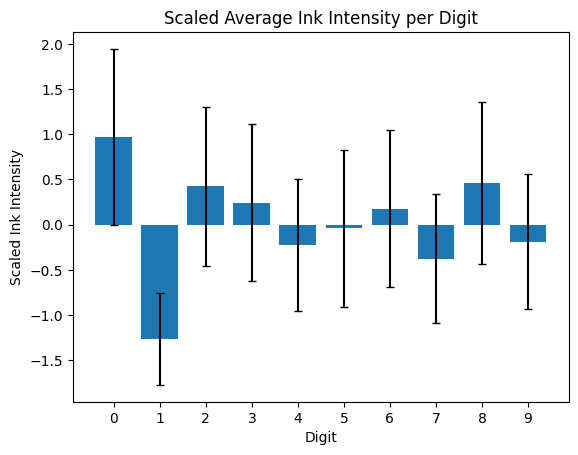

In [77]:
plt.bar(digits, ink_mean, yerr=ink_std, capsize=3)
plt.xlabel('Digit')
plt.ylabel('Scaled Ink Intensity')
plt.title('Scaled Average Ink Intensity per Digit')
plt.xticks(digits)
plt.show()

In [15]:
model = LogisticRegression(multi_class='multinomial')
model.fit(ink_scaled, labels)

LogisticRegression(multi_class='multinomial')

In [16]:
y_pred = model.predict(ink_scaled)
accuracy = np.sum(y_pred == labels) / len(labels)
print(f"Model accuracy: {accuracy:.1%}")

Model accuracy: 22.7%


In [17]:
for digit in digits:
    digit_accuracy = np.sum(y_pred[labels == digit] == labels[labels == digit]) / len(labels[labels == digit])
    print(f"Model accuracy for '{digit}': {digit_accuracy:.1%}")    

Model accuracy for '0': 58.6%
Model accuracy for '1': 81.6%
Model accuracy for '2': 7.8%
Model accuracy for '3': 23.8%
Model accuracy for '4': 0.0%
Model accuracy for '5': 0.0%
Model accuracy for '6': 0.0%
Model accuracy for '7': 38.5%
Model accuracy for '8': 0.0%
Model accuracy for '9': 5.3%


In [18]:
cm = confusion_matrix(labels, y_pred)
cm

array([[2420,   83,  322,  805,    0,    0,    0,  384,    0,  118],
       [  10, 3823,    5,  101,    0,    0,    0,  722,    0,   23],
       [1496,  280,  326, 1039,    0,    0,    0,  874,    0,  162],
       [1247,  408,  334, 1037,    0,    0,    0, 1141,    0,  184],
       [ 440,  831,  196,  886,    0,    0,    0, 1494,    0,  225],
       [ 728,  672,  197,  846,    0,    0,    0, 1189,    0,  163],
       [1057,  451,  296,  982,    0,    0,    0, 1144,    0,  207],
       [ 325, 1194,  149,  819,    0,    0,    0, 1696,    0,  218],
       [1430,  192,  343, 1047,    0,    0,    0,  879,    0,  172],
       [ 484,  764,  197,  869,    0,    0,    0, 1650,    0,  224]])

In [19]:
block_size = 4
brightest_blocks = []
for image in features:
    brightest_block_i = 0
    brightest_block_val = 0
    for i, _ in enumerate(image[:-block_size * img_size]):
        block_brightness = sum(sum(image[j * img_size + i: j * img_size + i + block_size])
                               for j in range(block_size))
        if block_brightness > brightest_block_val:
            brightest_block_val = block_brightness
            brightest_block_i = i
    
    brightest_blocks.append(brightest_block_i)
    #break
#     print(brightest_block_i)
#     break
# 
# plt.imshow(image.reshape(img_size, img_size), cmap='gray')

In [82]:
bblock_loc_mean = [np.mean(np.asarray(brightest_blocks)[labels == digit]) for digit in digits]
bblock_loc_std = [np.std(np.asarray(brightest_blocks)[labels == digit]) for digit in digits]

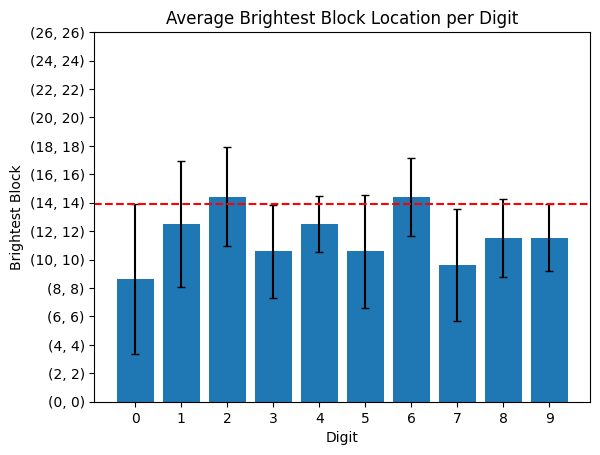

In [97]:
bblock_loc_row_mean = [loc // 28 for loc in bblock_loc_mean]

# Adjust bblock_loc_std similarly if it represents linear indices
bblock_loc_row_std = [std / 28 for std in bblock_loc_std]

# Plotting
plt.bar(digits, bblock_loc_row_mean, yerr=bblock_loc_row_std, capsize=3)
plt.axhline(y=14.5, color='r', linestyle='--')  # Line at middle (14th row)
plt.xlabel('Digit')
plt.ylabel('Brightest Block')
plt.title('Average Brightest Block Location per Digit')
plt.xticks(digits)
plt.yticks([x * 1.04 for x in range(0, 28, 2)], [f"({i}, {i})" for i in range(0, 28, 2)])

plt.show()

In [98]:
brightest_blocks_scaled = preprocessing.scale(brightest_blocks).reshape(-1, 1)

In [99]:
bblock_loc_mean = [np.mean(brightest_blocks_scaled[labels == digit]) for digit in digits]
bblock_loc_std = [np.std(brightest_blocks_scaled[labels == digit]) for digit in digits]

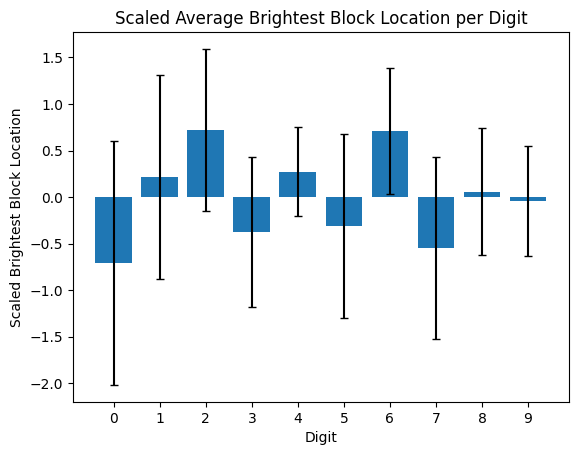

In [104]:


# Plotting
plt.bar(digits, bblock_loc_mean, yerr=bblock_loc_std, capsize=3)
# plt.axhline(y=14.5, color='r', linestyle='--')  # Line at middle (14th row)
plt.xlabel('Digit')
plt.ylabel('Scaled Brightest Block Location')
plt.title('Scaled Average Brightest Block Location per Digit')
plt.xticks(digits)
# plt.yticks([x * 1.04 for x in range(0, 28, 2)], [f"({i}, {i})" for i in range(0, 28, 2)])

plt.show()

In [21]:
# middle_block_size = 10
# middle_brightness = []
# for image in features:
#     middle_brightness.append(
#         sum(sum(image[len(image) // 2 - middle_block_size // 2 + j * img_size:
#                       len(image) // 2 + middle_block_size // 2 + j * img_size + 1])
#             for j in range(-middle_block_size // 2, middle_block_size // 2))
#     )

In [22]:
# middle_brightness_scaled = preprocessing.scale(middle_brightness).reshape(-1, 1)

In [23]:
# v_mirrored_inks = np.asarray([sum(image[:len(image) // 2])*2 for image in features]).reshape(-1, 1)
# other_inks = np.sum(features[:, :features.shape[1] // 2], axis=0) * 2
# 
# sum(v_mirrored_inks), sum(other_inks)

(array([1034306380]), 1034306380)

In [24]:
# h_mirrored_inks = np.asarray([sum(image.reshape(img_size, img_size)[:, img_size // 2])*2 for image in features]).reshape(-1, 1)

In [25]:
# column_ink = np.asarray([sum(image.reshape(img_size, img_size)[:, 18]) for image in features]).reshape(-1, 1)
# column_ink.shape

(42000, 1)

In [105]:
from sklearn.preprocessing import MinMaxScaler

# final_features = np.column_stack((ink_scaled, brightest_blocks_scaled))
# final_features = np.column_stack((ink_scaled, column_ink))
# final_features = ink_scaled
# final_features = MinMaxScaler().fit_transform(np.asarray(brightest_blocks).reshape(-1, 1))
# final_features = brightest_blocks_scaled
# final_features = column_ink
# final_features = np.asarray(brightest_blocks).reshape(-1, 1)
# final_features = middle_brightness_scaled
# final_features = np.column_stack((ink_scaled, middle_brightness_scaled))
# final_features = np.column_stack((ink, v_mirrored_inks))
# final_features = np.column_stack((ink, h_mirrored_inks))
# final_features = np.column_stack((np.asarray(brightest_blocks).reshape(-1, 1), ink_scaled))

In [111]:
model = LogisticRegression(multi_class='multinomial')
model.fit(brightest_blocks_scaled, labels)

LogisticRegression(multi_class='multinomial')

In [112]:
y_pred = model.predict(brightest_blocks_scaled)
accuracy = np.sum(y_pred == labels) / len(labels)
print(f"Model accuracy: {accuracy:.1%}")

Model accuracy: 19.8%


In [113]:
for digit in digits:
    digit_accuracy = np.sum(y_pred[labels == digit] == labels[labels == digit]) / len(labels[labels == digit])
    print(f"Model accuracy for '{digit}': {digit_accuracy:.1%}")    

Model accuracy for '0': 63.2%
Model accuracy for '1': 20.0%
Model accuracy for '2': 71.8%
Model accuracy for '3': 22.7%
Model accuracy for '4': 0.0%
Model accuracy for '5': 0.0%
Model accuracy for '6': 0.0%
Model accuracy for '7': 18.2%
Model accuracy for '8': 0.0%
Model accuracy for '9': 0.0%


In [30]:
cm = confusion_matrix(labels, y_pred)
cm

array([[2355,   73,  191,  826,    9,    0,   69,  526,   33,   50],
       [  11, 3796,    4,   66,    0,    0,    7,  792,    1,    7],
       [1086,  379,  213, 1461,   21,    0,   95,  827,    7,   88],
       [ 711,  334,  193, 1714,   31,    0,   11, 1241,    8,  108],
       [ 308,  603,   85, 1084,  113,    0,   45, 1701,   18,  115],
       [ 606,  891,  137,  837,    6,    0,  105, 1116,   11,   86],
       [1047,  383,  210,  887,    1,    0,   49, 1441,   24,   95],
       [ 194,  694,   83, 1021,   38,    0,   11, 2214,    1,  145],
       [1310,  289,  209, 1060,    3,    0,   88,  999,   30,   75],
       [ 256,  653,   92, 1263,   76,    0,   10, 1720,    3,  115]])

In [45]:
both_features = np.column_stack((ink_scaled, brightest_blocks_scaled))
both_features.shape

(42000, 2)

In [32]:
model = LogisticRegression(multi_class='multinomial')
model.fit(both_features, labels)

LogisticRegression(multi_class='multinomial')

In [33]:
y_pred = model.predict(both_features)
accuracy = np.sum(y_pred == labels) / len(labels)
print(f"Model accuracy: {accuracy:.1%}")

Model accuracy: 33.4%


In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=37000, random_state=28)

In [187]:
X_train = X_train / 255
X_test = X_test / 255

In [157]:
model = LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga', max_iter=100)
model.fit(X_train, y_train)

/home/platelminto/Documents/uu/patternrecognition-mnist2/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', penalty='l1', solver='saga')

In [158]:
y_pred = model.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Model accuracy: {accuracy:.1%}")

Model accuracy: 89.8%


In [159]:
from cuml.linear_model import LogisticRegression as LogisticRegressionGPU
import cupy as cp

X_train_gpu = cp.asarray(X_train.astype(np.float32))
X_val_gpu = cp.asarray(X_test)
y_train_gpu = cp.asarray(y_train.astype(np.float32))
y_test_gpu = cp.asarray(y_test)

model_gpu = LogisticRegressionGPU(
    penalty='l1', 
    solver='qn',  # 'qn' is similar to 'saga' but for GPU
    max_iter=10000
)

model_gpu.fit(X_train_gpu, y_train_gpu)

LogisticRegression()

In [160]:
y_pred = model_gpu.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Model accuracy: {accuracy:.1%}")

Model accuracy: 89.4%


In [114]:
from sklearn.model_selection import KFold

n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=28)

In [115]:
import cuml
import numpy as np
from sklearn.metrics import accuracy_score
import cupy as cp

In [116]:
scores = []
for train_index, val_index in kf.split(X_train):
    X_train_split, X_val_split = X_train[train_index], X_train[val_index]
    y_train_split, y_val_split = y_train[train_index], y_train[val_index]
    
    X_train_gpu = cp.asarray(X_train_split.astype(np.float32))
    X_val_gpu = cp.asarray(X_val_split.astype(np.float32))
    y_train_gpu = cp.asarray(y_train_split.astype(np.float32))

    model = cuml.LogisticRegression(
        penalty='l1', 
        solver='qn',
        max_iter=10000,
        C=.01,
    )
    model.fit(X_train_gpu, y_train_gpu)

    predictions = model.predict(X_val_gpu) 
    score = accuracy_score(y_val_split, predictions.get())
    
    scores.append(score)

average_score = np.mean(scores)
print(f"Average score across {n_splits} folds: {average_score:.1%}")

Average score across 5 folds: 88.4%


In [198]:
import gc

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

kernel_gamma_grid = {
    'linear': [1],  # Gamma does not apply to linear kernel
    'rbf': [10 ** x for x in range(-3, 4)],
    'poly': [10 ** x for x in range(-3, 4)],
    'sigmoid': [10 ** x for x in range(-3, 4)],
}

kernel_degree_grid = {
    'linear': [1],  # Degree does not apply to linear kernel
    'rbf': [1],  # Degree does not apply to rbf kernel
    'poly': [2, 3, 4],
    'sigmoid': [1],  # Degree does not apply to sigmoid kernel
}

# To store the scores for each combination
grid_scores = {}

# Iterate over each combination of parameters
for C in param_grid['C']:
    for kernel in param_grid['kernel']:
        for gamma in kernel_gamma_grid[kernel]:
            for degree in kernel_degree_grid[kernel]:
                scores = []
                for train_index, val_index in kf.split(X_train):
                    X_train_split, X_val_split = X_train[train_index], X_train[val_index]
                    y_train_split, y_val_split = y_train[train_index], y_train[val_index]

                    X_train_gpu = cp.asarray(X_train_split.astype(np.float32))
                    X_val_gpu = cp.asarray(X_val_split.astype(np.float32))
                    y_train_gpu = cp.asarray(y_train_split.astype(np.float32))
                    
                    # Create the model with the current set of parameters
                    model = cuml.svm.SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)
                    model.fit(X_train_gpu, y_train_gpu)

                    predictions = model.predict(X_val_gpu)
                    score = accuracy_score(y_val_split, predictions.get())
                    scores.append(score)

                    del model, predictions
                    gc.collect()
                    cp.get_default_memory_pool().free_all_blocks()  # Free CuPy memory

                # Average score for the current parameter combination
                average_score = np.mean(scores)
                grid_scores[(C, kernel, gamma, degree)] = average_score
                print(f"Average score for C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {average_score:.1%}")

# Find the best parameters
best_params = max(grid_scores, key=grid_scores.get)
best_score = grid_scores[best_params]

print(f"\nBest Parameters: {best_params}")
print(f"Best Score: {best_score:.1%}")

Average score for C=0.01, kernel=linear, gamma=1, degree=1: 91.7%
Average score for C=0.01, kernel=rbf, gamma=0.001, degree=1: 10.4%
Average score for C=0.01, kernel=rbf, gamma=0.01, degree=1: 43.1%
Average score for C=0.01, kernel=rbf, gamma=0.1, degree=1: 10.4%
Average score for C=0.01, kernel=rbf, gamma=1, degree=1: 10.4%
Average score for C=0.01, kernel=rbf, gamma=10, degree=1: 10.4%
Average score for C=0.01, kernel=rbf, gamma=100, degree=1: 10.4%
Average score for C=0.01, kernel=rbf, gamma=1000, degree=1: 10.4%
Average score for C=0.01, kernel=poly, gamma=0.001, degree=2: 10.4%
Average score for C=0.01, kernel=poly, gamma=0.001, degree=3: 10.4%
Average score for C=0.01, kernel=poly, gamma=0.001, degree=4: 10.4%
Average score for C=0.01, kernel=poly, gamma=0.01, degree=2: 45.0%
Average score for C=0.01, kernel=poly, gamma=0.01, degree=3: 30.5%
Average score for C=0.01, kernel=poly, gamma=0.01, degree=4: 27.3%
Average score for C=0.01, kernel=poly, gamma=0.1, degree=2: 93.9%
Average

In [219]:
sorted(grid_scores.items(), key=lambda kv: kv[1], reverse=True)

[((10, 'rbf', 0.01, 1), 0.9562000000000002),
 ((100, 'rbf', 0.01, 1), 0.9559999999999998),
 ((0.01, 'poly', 100, 2), 0.9507999999999999),
 ((0.1, 'poly', 100, 2), 0.9507999999999999),
 ((1, 'poly', 100, 2), 0.9507999999999999),
 ((10, 'poly', 100, 2), 0.9507999999999999),
 ((100, 'poly', 100, 2), 0.9507999999999999),
 ((0.01, 'poly', 1, 2), 0.9506),
 ((0.01, 'poly', 10, 2), 0.9506),
 ((0.01, 'poly', 1000, 2), 0.9506),
 ((0.1, 'poly', 1, 2), 0.9506),
 ((0.1, 'poly', 10, 2), 0.9506),
 ((0.1, 'poly', 1000, 2), 0.9506),
 ((1, 'poly', 0.1, 2), 0.9506),
 ((1, 'poly', 1, 2), 0.9506),
 ((1, 'poly', 10, 2), 0.9506),
 ((1, 'poly', 1000, 2), 0.9506),
 ((10, 'poly', 0.1, 2), 0.9506),
 ((10, 'poly', 1, 2), 0.9506),
 ((10, 'poly', 10, 2), 0.9506),
 ((10, 'poly', 1000, 2), 0.9506),
 ((100, 'poly', 0.01, 2), 0.9506),
 ((100, 'poly', 0.1, 2), 0.9506),
 ((100, 'poly', 1, 2), 0.9506),
 ((100, 'poly', 10, 2), 0.9506),
 ((100, 'poly', 1000, 2), 0.9506),
 ((0.1, 'poly', 0.1, 2), 0.9503999999999999),
 ((10, 

In [218]:
import gc

kernels = ['rbf', 'poly']

C_grid = {
    'rbf': [4, 16, 64],
    'poly': [1, 4, 16, 64, 256],
}

gamma_grid = {
    'rbf': [0.05, 0.01, 0.005, 0.001],
    'poly': [10 ** x for x in range(-2, 4)],
}

degree_grid = {
    'rbf': [1],  # Degree does not apply to rbf kernel
    'poly': [2],
}

# To store the scores for each combination
detail_grid_scores = {}

# Iterate over each combination of parameters
for kernel in kernels:
    for C in C_grid[kernel]:
        for gamma in gamma_grid[kernel]:
            for degree in degree_grid[kernel]:
                scores = []
                for train_index, val_index in kf.split(X_train):
                    X_train_split, X_val_split = X_train[train_index], X_train[val_index]
                    y_train_split, y_val_split = y_train[train_index], y_train[val_index]

                    X_train_gpu = cp.asarray(X_train_split.astype(np.float32))
                    X_val_gpu = cp.asarray(X_val_split.astype(np.float32))
                    y_train_gpu = cp.asarray(y_train_split.astype(np.float32))

                    # Create the model with the current set of parameters
                    # print(1 / (X_train_gpu.var() * X_train_gpu.shape[1]))
                    model = cuml.svm.SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)
                    model.fit(X_train_gpu, y_train_gpu)

                    predictions = model.predict(X_val_gpu)
                    score = accuracy_score(y_val_split, predictions.get())
                    scores.append(score)

                    del model, predictions
                    gc.collect()
                    cp.get_default_memory_pool().free_all_blocks()  # Free CuPy memory

                # Average score for the current parameter combination
                average_score = np.mean(scores)
                detail_grid_scores[(C, kernel, gamma, degree)] = average_score
                print(f"Average score for C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {average_score:.1%}")

# Find the best parameters
detail_best_params = max(detail_grid_scores, key=detail_grid_scores.get)
detail_best_score = detail_grid_scores[detail_best_params]

print(f"\nBest Parameters: {detail_best_params}")
print(f"Best Score: {detail_best_score:.1%}")

Average score for C=4, kernel=rbf, gamma=0.05, degree=1: 94.8%
Average score for C=4, kernel=rbf, gamma=0.01, degree=1: 95.5%
Average score for C=4, kernel=rbf, gamma=0.005, degree=1: 94.2%
Average score for C=4, kernel=rbf, gamma=0.001, degree=1: 92.0%
Average score for C=16, kernel=rbf, gamma=0.05, degree=1: 94.8%
Average score for C=16, kernel=rbf, gamma=0.01, degree=1: 95.6%
Average score for C=16, kernel=rbf, gamma=0.005, degree=1: 94.7%
Average score for C=16, kernel=rbf, gamma=0.001, degree=1: 92.9%
Average score for C=64, kernel=rbf, gamma=0.05, degree=1: 94.8%
Average score for C=64, kernel=rbf, gamma=0.01, degree=1: 95.6%
Average score for C=64, kernel=rbf, gamma=0.005, degree=1: 94.7%
Average score for C=64, kernel=rbf, gamma=0.001, degree=1: 93.1%
Average score for C=1, kernel=poly, gamma=0.01, degree=2: 93.9%
Average score for C=1, kernel=poly, gamma=0.1, degree=2: 95.1%
Average score for C=1, kernel=poly, gamma=1, degree=2: 95.1%
Average score for C=1, kernel=poly, gamma=

In [223]:
final_parameters = {
    'C': 10,
    'kernel': 'rbf',
    'gamma': 0.01,  # very close to 'scale' parameter! 1 / (n_features*x.var())
}

In [224]:
X_train.shape, X_test.shape

((5000, 784), (37000, 784))

In [225]:
X_train_gpu = cp.asarray(X_train.astype(np.float32))
X_test_gpu = cp.asarray(X_test.astype(np.float32))
y_train_gpu = cp.asarray(y_train.astype(np.float32))

In [226]:
model = cuml.svm.SVC(**final_parameters)
model.fit(X_train_gpu, y_train_gpu)

predictions = model.predict(X_test_gpu)
score = accuracy_score(y_test, predictions.get())

print(f"Final score for SVM (with hyperparameters {final_parameters}): {score:.1%}")

[W] [17:01:37.887627] Warning: could not fill working set, found only 1003 elements
[W] [17:01:37.890884] Warning: could not fill working set, found only 768 elements
[W] [17:01:37.892711] Warning: could not fill working set, found only 784 elements
[W] [17:01:38.041561] Warning: could not fill working set, found only 772 elements
[W] [17:01:38.043203] Warning: could not fill working set, found only 774 elements
[W] [17:01:38.061888] Warning: could not fill working set, found only 773 elements
[W] [17:01:38.063521] Warning: could not fill working set, found only 814 elements
[W] [17:01:38.064795] Warning: could not fill working set, found only 856 elements
[W] [17:01:38.128272] Warning: could not fill working set, found only 772 elements
[W] [17:01:38.129981] Warning: could not fill working set, found only 774 elements
[W] [17:01:38.149800] Warning: could not fill working set, found only 775 elements
[W] [17:01:38.151488] Warning: could not fill working set, found only 801 elements
[W]

In [228]:
for digit in digits:
    digit_accuracy = np.sum(predictions.get()[y_test == digit] == y_test[y_test == digit]) / len(y_test[y_test == 
                                                                                                        digit])
    print(f"Model accuracy for '{digit}': {digit_accuracy:.1%}")    

Model accuracy for '0': 98.7%
Model accuracy for '1': 98.2%
Model accuracy for '2': 94.4%
Model accuracy for '3': 93.6%
Model accuracy for '4': 96.3%
Model accuracy for '5': 94.0%
Model accuracy for '6': 96.9%
Model accuracy for '7': 95.6%
Model accuracy for '8': 95.0%
Model accuracy for '9': 92.2%


In [229]:
cm = confusion_matrix(y_test, predictions.get())
cm

array([[3593,    0,    5,    3,    7,    7,   14,    0,   10,    2],
       [   0, 4092,   15,   12,   10,    5,    1,   12,   19,    1],
       [  16,   11, 3464,   24,   22,   17,   15,   51,   40,    8],
       [   7,    8,   53, 3557,    1,   78,    8,   23,   50,   17],
       [   6,   11,   12,    0, 3460,    2,   25,    8,    6,   63],
       [  13,    4,   11,   74,    8, 3152,   32,    3,   39,   17],
       [  28,    5,   19,    1,   18,   27, 3514,    0,   15,    1],
       [  15,   14,   31,    6,   45,    4,    1, 3699,    5,   48],
       [   8,   19,    9,   38,   15,   39,   15,   12, 3383,   22],
       [  17,    9,    7,   38,  108,   10,    1,   68,   31, 3431]])

In [213]:
import gc

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}

# To store the scores for each combination
lr_grid_scores = {}

# Iterate over each combination of parameters
for C in param_grid['C']:
    scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_split, X_val_split = X_train[train_index], X_train[val_index]
        y_train_split, y_val_split = y_train[train_index], y_train[val_index]

        X_train_gpu = cp.asarray(X_train_split.astype(np.float32))
        X_val_gpu = cp.asarray(X_val_split.astype(np.float32))
        y_train_gpu = cp.asarray(y_train_split.astype(np.float32))

        # Create the model with the current set of parameters
        model = LogisticRegressionGPU(
            penalty='l1', 
            solver='qn',
            max_iter=50000,
            C=C,
        )
        model.fit(X_train_gpu, y_train_gpu)

        predictions = model.predict(X_val_gpu)
        score = accuracy_score(y_val_split, predictions.get())
        scores.append(score)

        del model, predictions
        gc.collect()
        cp.get_default_memory_pool().free_all_blocks()  # Free CuPy memory

    # Average score for the current parameter combination
    average_score = np.mean(scores)
    lr_grid_scores[C] = average_score
    print(f"Average score for C={C}: {average_score:.1%}")

# Find the best parameters
lr_best_params = max(lr_grid_scores, key=lr_grid_scores.get)
lr_best_score = lr_grid_scores[lr_best_params]

print(f"\nBest Parameters: {lr_best_params}")
print(f"Best Score: {lr_best_score:.1%}")

Average score for C=0.01: 63.4%
Average score for C=0.1: 86.2%
Average score for C=1: 89.2%
Average score for C=10: 87.6%
Average score for C=100: 87.0%

Best Parameters: 1
Best Score: 89.2%


In [214]:
import gc

param_grid = {
    'C': [0.5, 0.75, 1, 2.5, 5],
}

# To store the scores for each combination
lr_grid_scores = {}

# Iterate over each combination of parameters
for C in param_grid['C']:
    scores = []
    for train_index, val_index in kf.split(X_train):
        X_train_split, X_val_split = X_train[train_index], X_train[val_index]
        y_train_split, y_val_split = y_train[train_index], y_train[val_index]

        X_train_gpu = cp.asarray(X_train_split.astype(np.float32))
        X_val_gpu = cp.asarray(X_val_split.astype(np.float32))
        y_train_gpu = cp.asarray(y_train_split.astype(np.float32))

        # Create the model with the current set of parameters
        model = LogisticRegressionGPU(
            penalty='l1', 
            solver='qn',
            max_iter=50000,
            C=C,
        )
        model.fit(X_train_gpu, y_train_gpu)

        predictions = model.predict(X_val_gpu)
        score = accuracy_score(y_val_split, predictions.get())
        scores.append(score)

        del model, predictions
        gc.collect()
        cp.get_default_memory_pool().free_all_blocks()  # Free CuPy memory

    # Average score for the current parameter combination
    average_score = np.mean(scores)
    lr_grid_scores[C] = average_score
    print(f"Average score for C={C}: {average_score:.1%}")

# Find the best parameters
lr_best_params = max(lr_grid_scores, key=lr_grid_scores.get)
lr_best_score = lr_grid_scores[lr_best_params]

print(f"\nBest Parameters: C={lr_best_params}")
print(f"Best Score: {lr_best_score:.1%}")

[W] [15:35:44.362598] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)
[W] [15:35:45.110035] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)
Average score for C=0.5: 89.1%
[W] [15:35:48.004117] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)
Average score for C=0.75: 89.3%
[W] [15:35:48.486533] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)
[W] [15:35:49.526587] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)
Average score for C=1: 89.3%
Average score for C=2.5: 88.3%
Average score for C=5: 87.9%

Best Parameters: C=0.75
Best Score: 89.3%


In [216]:
final_parameters_lr = {
    'C': 0.75,
    'max_iter': 50000,
    'penalty':'l1', 
    'solver':'qn',
}

In [230]:
model = LogisticRegressionGPU(**final_parameters_lr)
model.fit(X_train_gpu, y_train_gpu)

predictions = model.predict(X_test_gpu)
score = accuracy_score(y_test, predictions.get())

print(f"Final score for LogisticRegression (with hyperparameters {final_parameters_lr}): {score:.1%}")

Final score for LogisticRegression (with hyperparameters {'C': 0.75, 'max_iter': 50000, 'penalty': 'l1', 'solver': 'qn'}): 89.6%


In [231]:
for digit in digits:
    digit_accuracy = np.sum(predictions.get()[y_test == digit] == y_test[y_test == digit]) / len(y_test[y_test == 
                                                                                                        digit])
    print(f"Model accuracy for '{digit}': {digit_accuracy:.1%}")    

Model accuracy for '0': 95.8%
Model accuracy for '1': 96.2%
Model accuracy for '2': 85.9%
Model accuracy for '3': 87.2%
Model accuracy for '4': 91.0%
Model accuracy for '5': 83.2%
Model accuracy for '6': 92.3%
Model accuracy for '7': 91.7%
Model accuracy for '8': 84.7%
Model accuracy for '9': 86.3%


In [232]:
cm = confusion_matrix(y_test, predictions.get())
cm

array([[3489,    1,   13,   13,    8,   64,   31,    3,   14,    5],
       [   1, 4007,   19,   29,    5,   11,    4,   19,   68,    4],
       [  48,   35, 3151,   60,   59,   21,   53,  115,  103,   23],
       [  19,   11,   76, 3314,    5,  187,   12,   56,   76,   46],
       [  13,   16,   35,    8, 3268,    6,   51,   11,   16,  169],
       [  42,   20,   44,  148,   53, 2791,   56,   24,  125,   50],
       [  43,   16,   74,    9,   45,   53, 3349,    3,   33,    3],
       [  20,   34,   58,   10,   55,    7,    1, 3548,    9,  126],
       [  32,   73,   51,  129,   30,  116,   29,   33, 3014,   53],
       [  33,   23,   11,   56,  173,   25,    2,  162,   24, 3211]])